In [88]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

In [2]:
in_dir = 'dataset2-master/dataset2-master/images'

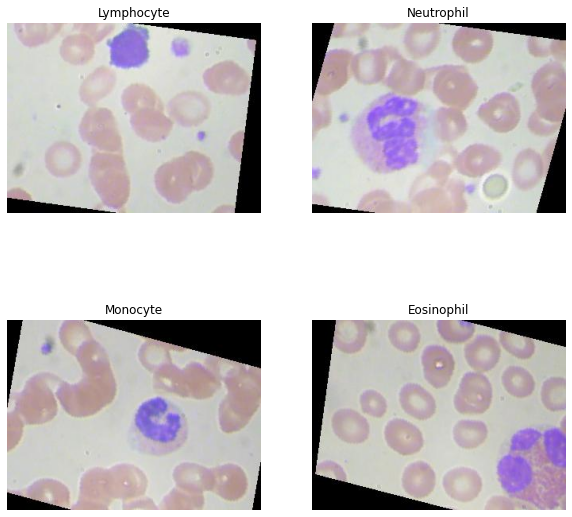

<Figure size 864x576 with 0 Axes>

In [3]:

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
def plotImage(h,w,image_path,title):
    image = cv2.imread(image_path)  # BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # RGB
    axes[w,h].imshow(image)
    axes[w,h].axis('off')
    axes[w,h].set_title(title)
    
plt.figure(figsize=(12,8))
lymp_path = os.path.join(in_dir, 'TRAIN/LYMPHOCYTE') 
mono_path = os.path.join(in_dir, 'TRAIN/MONOCYTE')
neu_path = os.path.join(in_dir, 'TRAIN/NEUTROPHIL')
eos_path = os.path.join(in_dir, 'TRAIN/EOSINOPHIL')
plotImage(0,0,os.path.join(lymp_path, random.choice(os.listdir(lymp_path))),'Lymphocyte')
plotImage(0,1,os.path.join(mono_path, random.choice(os.listdir(mono_path))),'Monocyte')
plotImage(1,0,os.path.join(neu_path, random.choice(os.listdir(neu_path))),'Neutrophil')
plotImage(1,1,os.path.join(eos_path, random.choice(os.listdir(eos_path))),'Eosinophil')
plt.tight_layout()
plt.show()

Total Train samples: 9957

Total Test samples: 2487



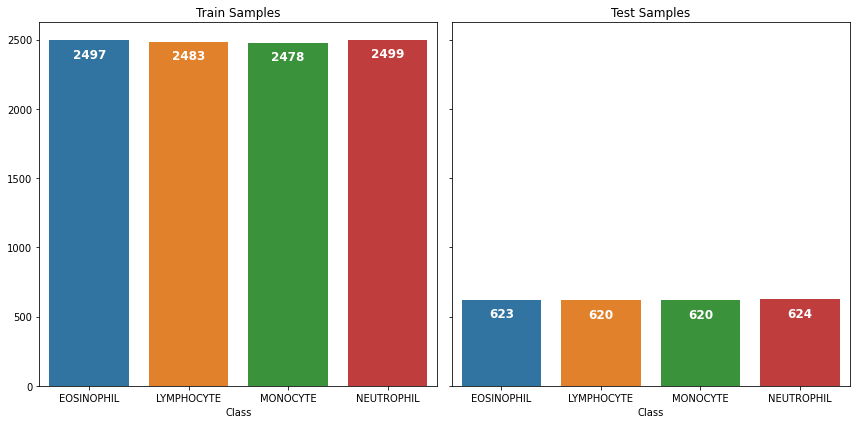

In [4]:
train_dir = os.path.join(in_dir, "TRAIN")
test_dir = os.path.join(in_dir, "TEST")
num_samples = 0
def plot_num_samples(path, s, ax):
    x = []
    y = []
    for cls in os.listdir(path):
        num_imgs = len(os.listdir(os.path.join(path, cls)))
        num_samples += num_imgs
        x.append(cls)
        y.append(num_imgs)

    print('Total ' + s + ' samples: {:d}\n'.format(num_samples))
    sns.barplot(x=x, y=y, ax=ax)
    ax.set_xlabel('Class')
    ax.set_title(s + ' Samples')
    for index, value in enumerate(y):
        ax.text(index, value-150, str(value), ha='center', va='bottom', color='white',weight='bold', fontsize=12)



fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
plot_num_samples(train_dir, "Train", ax1)
plot_num_samples(test_dir, "Test", ax2)
plt.tight_layout()
plt.show()

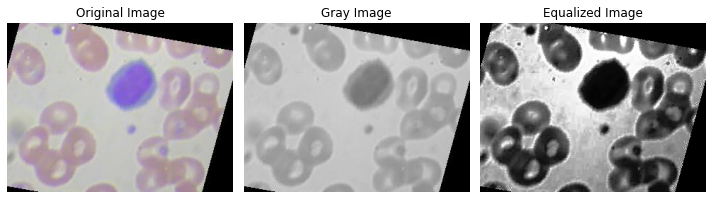

In [5]:
random_file = random.choice(os.listdir(lymp_path))
image = cv2.imread(os.path.join(lymp_path, random_file), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join(lymp_path, random_file))
image2 = image2[:, :, [2, 1, 0]]


# Perform histogram equalization
equalized_image = cv2.equalizeHist(image)
# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image2)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')


plt.tight_layout()
plt.show()

(240, 320, 3)

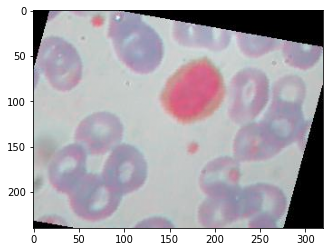

In [9]:
image3 = cv2.imread(os.path.join(lymp_path, random_file))
image3 = np.array(image3)
image3 = image3.astype(float) / 255

plt.imshow(image3)

In [136]:
def read_resize_img(path):
    image = cv2.imread(path)  # BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # RGB
    resized_image = cv2.resize(image, (160,120))
    return resized_image

In [137]:
def create_df(directory_path,num_cls):
    images = np.ndarray((len(os.listdir(directory_path)),120*160*3), dtype=np.uint8)
    i=0
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        resized_image = read_resize_img(file_path)
        images[i,:] = resized_image.ravel()
        i+=1
    df = pd.DataFrame(images)
    df["target"] = num_cls
    return df

In [138]:
mono_train = create_df(mono_path,1)
lymp_train = create_df(lymp_path,2)
neu_train = create_df(neu_path,3)
eos_train = create_df(eos_path,4)
df_train =pd.concat([mono_train,lymp_train,neu_train,eos_train])
df_train = shuffle(df_train).reset_index(drop=True)

In [139]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,57591,57592,57593,57594,57595,57596,57597,57598,57599,target
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,2,0,1
1,201,187,186,201,185,185,204,186,186,206,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,181,158,156,180,167,163,10,2,1,4
3,0,0,0,0,0,0,0,0,0,0,...,185,164,196,185,160,198,178,153,193,3
4,0,0,0,0,0,0,0,0,0,0,...,209,215,211,5,7,6,2,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9952,0,0,0,0,0,0,0,0,0,0,...,1,3,4,5,5,5,3,1,2,3
9953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9955,3,0,0,5,1,2,5,0,4,5,...,1,0,2,1,0,2,3,0,4,3


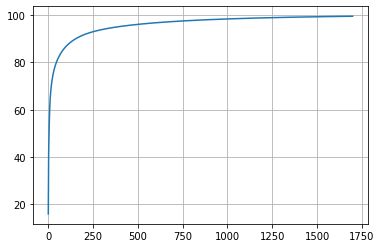

In [94]:
pca = PCA(n_components=1700)
pca.fit(lymp_train)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.savefig('pcal.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


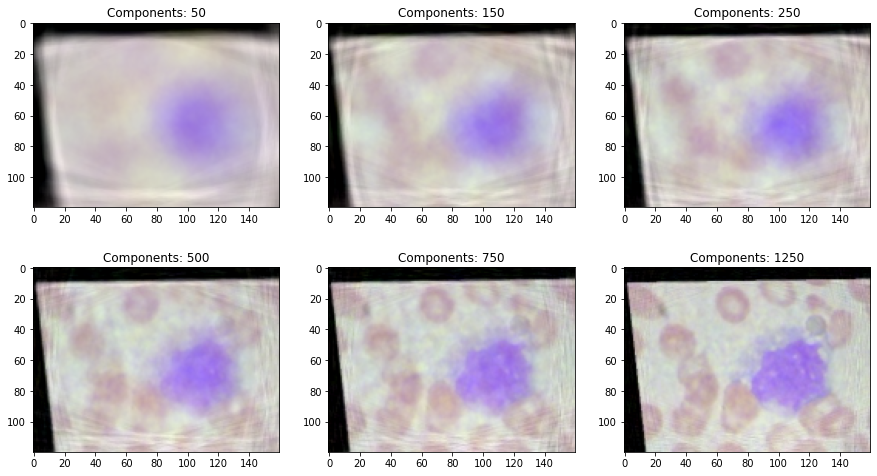

In [150]:



def plot_at_k(k):
    pca = PCA(n_components=k)
    x = mono_train.iloc[:, :-1]
#     print(np.array(x.iloc[2, :]))
    x = x.astype(float) / 255
    x = pca.fit_transform(x)         
    dff = pd.DataFrame(pca.inverse_transform(x))
#     print(np.array(dff.iloc[2, :]))
    plt.imshow(np.array(dff.iloc[2, :]).reshape((120, 160, 3)))


ks = [50, 150, 250,500,750,1250]

plt.figure(figsize=[15, 9])

for i in range(6):
    plt.subplot(2, 3, i+1)
    plot_at_k(ks[i])
    plt.title("Components: " + str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()
# first_row

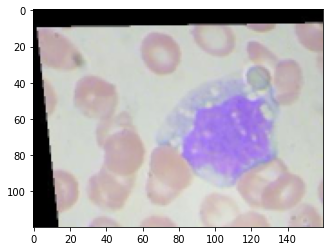

In [140]:
plt.imshow(np.array(mono_train.iloc[2, :-1]).reshape((120, 160, 3)))
